In [3]:
from numpy import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from plot_service import *

In [4]:
train_file = 'datasets/train.csv'

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

X_train, X_test, y_train, y_test = train_test_split(X, Y)

print('Data loaded!')

Data loaded!


In [5]:
model = RandomForestRegressor(n_estimators = 10, random_state = 42, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

building tree 1 of 10building tree 2 of 10
building tree 3 of 10

building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.1s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished


In [6]:
pred = preds.reshape(len(preds))
real = y_test

plot_table(real, pred)

|     Real |   Predict |
|----------+-----------|
| 0.064588 | 0.0585024 |
| 0.008952 | 0.0536166 |
| 0.166283 | 0.164939  |
| 0.33923  | 0.305875  |
| 0.502933 | 0.445749  |
| 0.151097 | 0.143699  |
| 0.191467 | 0.163705  |
| 0.103647 | 0.0904308 |
| 0.190892 | 0.184018  |
| 0.129716 | 0.141647  |
| 0.097589 | 0.0938942 |
| 0.222352 | 0.229673  |
| 0.029441 | 0.073626  |
| 0.194454 | 0.139753  |
| 0.051171 | 0.0815491 |
| 0.137253 | 0.110557  |
| 0.110256 | 0.0971953 |
| 0.224213 | 0.224783  |
| 0.152806 | 0.107836  |
| 0.151075 | 0.168848  |
| 0.366208 | 0.355508  |
| 0.042208 | 0.0447693 |
| 0.109769 | 0.0885416 |
| 0.176433 | 0.177027  |
| 0.072905 | 0.0486123 |
| 0.078555 | 0.0760643 |
| 0.068901 | 0.0553911 |
| 0.082265 | 0.0735485 |
| 0.270782 | 0.248566  |
| 0.165753 | 0.175779  |
| 0.083278 | 0.0723378 |
| 0.065895 | 0.0986243 |
| 0.089202 | 0.0832822 |
| 0.115785 | 0.107596  |
| 0.029473 | 0.0763293 |
| 0.052724 | 0.0477256 |
| 0.189796 | 0.158791  |
| 0.090224 | 0.119886  |


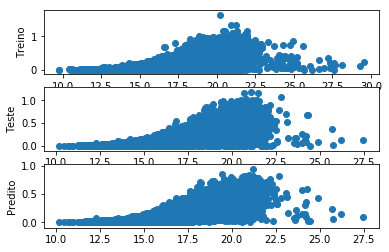

In [8]:
plot_scatter(X_train, y_train, X_test, y_test, preds, show_only=True)

In [9]:
errors = abs(pred - real)
print('Mean Absolute Error:', round(mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.02 degrees.


In [10]:
mape = 100 * (errors / real)
accuracy = 100 - mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 76.36 %.


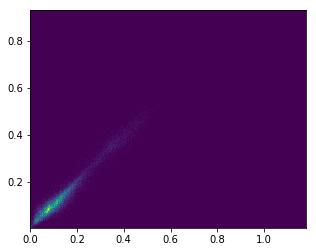

In [11]:
plot_hm(real, pred, show_only=True)